### **Underfitting and Overfitting**

The decision tree model has many options. The most important options determine the tree’s depth. It’s common for a tree to have a 10 split between the top level and a leaf, As the tree gets deeper, the dataset gets sliced up into leaves with fewer data.

If a tree only has 1 split, it divides the data into two groups. If each group is split again, we would get 4 grou[s of houses. Splitting those again will create 8 groups. If it keeps doubling the number of groups by adding more splits at each level, we will have 2^10 groups of houses by the time we get to the 10th level. That’s 1024 leaves.

When a data is divided into so many leaves, we also have less data into each leaf, this may make predictions that are quite close to those actual values, but they may make very unreliable predictions for new data because each prediction is based on only a few houses. This is a phenomenon called Overfitting, where a model matches the training data almost perfectly, but does poorly in validation and other new data.

On the flip side, if a tree is very shallow, it doesn’t divide up the houses into very distinct groups.

At an extreme, if a tree divides data into 2 or 4, each group still has a wide variety of houses. Resulting predictions may be far off for most data, even in training data. When a model fails to capture important patterns in the data, so it performs poorly even in training data, that is called Underfitting.

Since we care about accuracy on new data, which we estimate from our validation data, we want to find the sweet spot between underfitting and overfitting. Visually we want the low point of the (red) validation curve in the figure below.

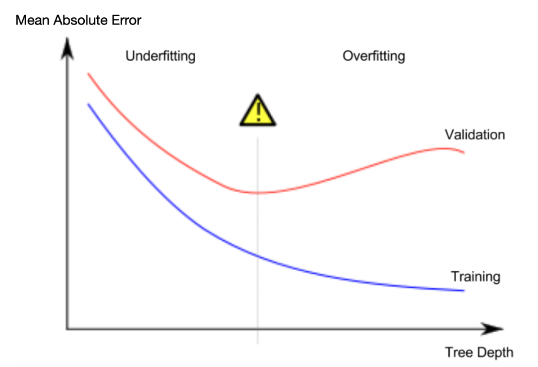


There are few alternatives for controlling the tree depth, and many allow for some routes through the tree to have greater depth than other routes. But the max_leaf_nodes argument provides a very sensible way to control overfitting vs underfitting. The more leaves we allow the model to make, the more we move from underfittin are in the above graph to the overfitting area.

We can use a utility fuction to comapre MAE scores the different values from max-leaf_nodes:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Data Loading Code Runs At This Point
import pandas as pd

# Load data
melbourne_file_path = '/content/drive/MyDrive/Colab Notebooks/Data Science & Machine Learning/Data/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path)
# Filter rows with missing values
filtered_melbourne_data = melbourne_data.dropna(axis=0)
# Choose target and features
y = filtered_melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea',
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = filtered_melbourne_data[melbourne_features]

In [8]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

In [5]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

The data is loaded into train_X, val_X, train_y and val_y using the code you've already seen (and which you've already written).

In [6]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  347380
Max leaf nodes: 50  		 Mean Absolute Error:  258171
Max leaf nodes: 500  		 Mean Absolute Error:  243495
Max leaf nodes: 5000  		 Mean Absolute Error:  255575
